In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
uberData= pd.read_csv(r"C:\Users\Dell\Desktop\Datascience\Uber_Case_Study\UberData.csv")
uberData

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [6]:
uberData['Request timestamp']=uberData['Request timestamp'].str.replace("-","/")
uberData['Drop timestamp']=uberData['Drop timestamp'].str.replace("-","/")

In [7]:
uberData['Request timestamp']= pd.to_datetime(uberData['Request timestamp'])
uberData['Drop timestamp']= pd.to_datetime(uberData['Drop timestamp'])

In [8]:
uberData_nodriver= uberData.loc[pd.isnull(uberData['Driver id'])]
uberData_nodriver.describe()

,Request id,Driver id
count,2650.000000,0.0
mean,3585.476981,NaN
std,1951.435310,NaN
min,2.000000,NaN
25%,2027.250000,NaN
50%,3697.000000,NaN
75%,5232.750000,NaN
max,6765.000000,NaN


In [9]:
uberData_nodriver['Status'].describe()

count                  2650
unique                    1
top       No Cars Available
freq                   2650
Name: Status, dtype: object

In [10]:
def rangetime(i):
    if i<6:
        return "Midnight to  early morning"
    elif  6<=i<11:
        return "early morning to rush hours"
    elif  11<=i<17:
        return "office hours"
    elif 15<=i<18:
        return "evenings"
    else:
        return "Nights(9 to 12)"

In [12]:
uberData['Request hour']= uberData['Request timestamp'].dt.hour
uberData

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,6


In [13]:
uberData['time']= uberData['Request hour'].apply(lambda i: rangetime(i))

Text(0.5,1,'Distribution of status wrt number of trips and time slots')

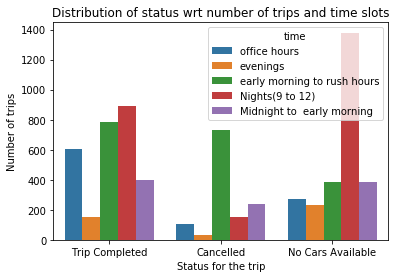

In [30]:
sns.countplot(x='Status',hue='time',data=uberData)
plt.xlabel('Status for the trip')
plt.ylabel('Number of trips')
plt.title('Distribution of status wrt number of trips and time slots')

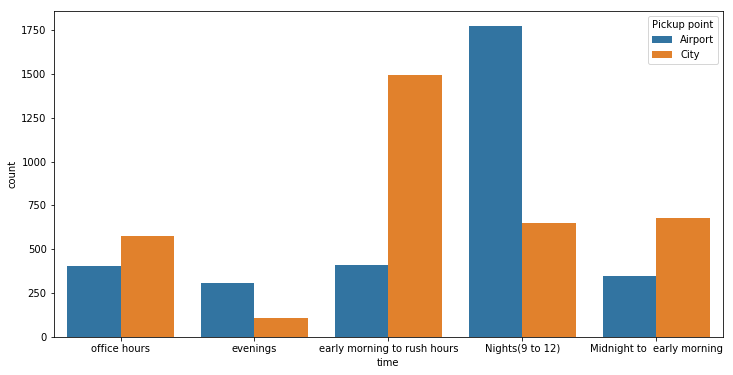

In [26]:
sns.countplot(x='time', hue='Pickup point', data=uberData)
plt.gcf().set_size_inches(12,6)

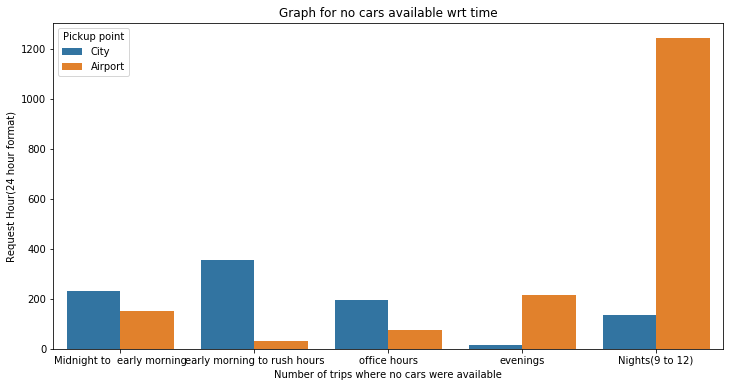

In [27]:
sns.countplot(x='time', hue='Pickup point', data= uberData.loc[uberData['Status']=="No Cars Available"])
plt.xlabel('Number of trips where no cars were available')
plt.ylabel('Request Hour(24 hour format)')
plt.title('Graph for no cars available wrt time')
plt.gcf().set_size_inches(12,6)

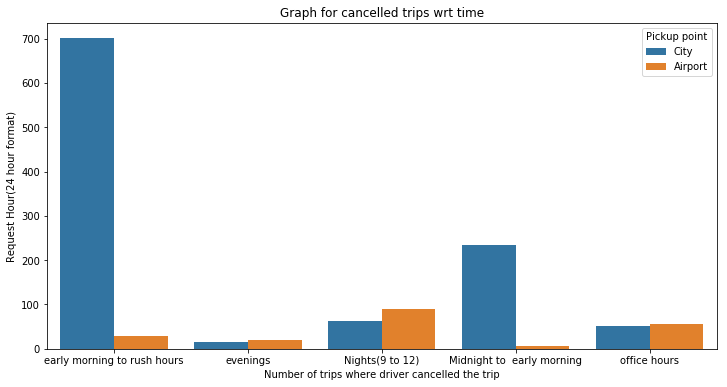

In [28]:
sns.countplot(x='time', hue='Pickup point', data= uberData.loc[uberData['Status']=="Cancelled"])
plt.xlabel('Number of trips where driver cancelled the trip')
plt.ylabel('Request Hour(24 hour format)')
plt.title('Graph for cancelled trips wrt time')
plt.gcf().set_size_inches(12,6)

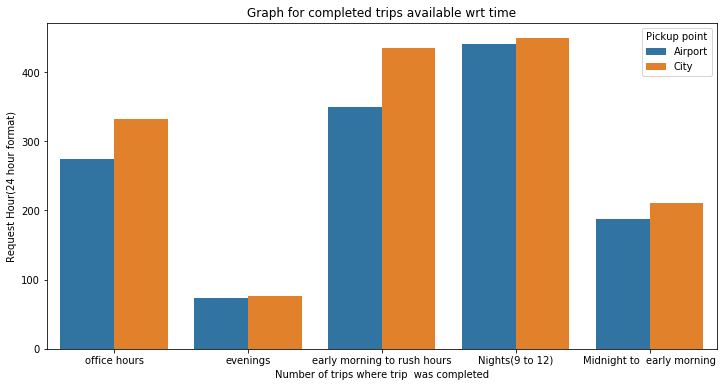

In [29]:
sns.countplot(x='time', hue='Pickup point', data= uberData.loc[uberData['Status']=="Trip Completed"])
plt.xlabel('Number of trips where trip  was completed')
plt.ylabel('Request Hour(24 hour format)')
plt.title('Graph for completed trips available wrt time')
plt.gcf().set_size_inches(12,6)